In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#training data
train=pd.read_csv('train.csv') 
data=train.copy()
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#training data
test=pd.read_csv('test.csv') 
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
print( f"training dataset (row, col): {train.shape} \n testing dataset (row, col): {test.shape}" )

training dataset (row, col): (614, 13) 
 testing dataset (row, col): (367, 12)


In [5]:
#Checking if there is any duplicate row in train dataset
train.duplicated().any()

False

There are no duplicate rows in our training dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#description of tha numerical data`
train.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
print( train['Credit_History'].value_counts() )

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [9]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0
train['Credit_History'] = train['Credit_History'].astype('O')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [11]:
# Loan_Id column is not needed, so we'll drop it for both test and train datasets
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)

# Handling missing data

In [12]:
# missing values in decsending order
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

#### We are replacing missing value using mode of data

In [13]:

train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
train['Dependents']=train['Dependents'].apply(lambda x: str(x).strip('+')[0]).astype('float64')
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [14]:
# missing values in decsending order
train.isnull().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

In [15]:
# missing values in decsending order
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
dtype: int64

In [16]:

test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
test['Dependents']=test['Dependents'].apply(lambda x: str(x).strip('+')[0]).astype('float64')
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [17]:
# missing values in decsending order
train.isnull().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

In [18]:
# We will separate the numerical columns from the categorical columns

cat_data = [] #categoric data
num_data = [] #numeric data

for i,c in enumerate(train.dtypes):
    if c == object:
        cat_data.append(train.iloc[:, i])
    else :
        num_data.append(train.iloc[:, i])
        
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [19]:
cat_data.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y


In [20]:
num_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849.0,0.0,120.0,360.0,1.0
1,1.0,4583.0,1508.0,128.0,360.0,1.0
2,0.0,3000.0,0.0,66.0,360.0,1.0
3,0.0,2583.0,2358.0,120.0,360.0,1.0
4,0.0,6000.0,0.0,141.0,360.0,1.0


# Data Visualization

The percentage of Y class : 68.73
The percentage of N class : 31.27


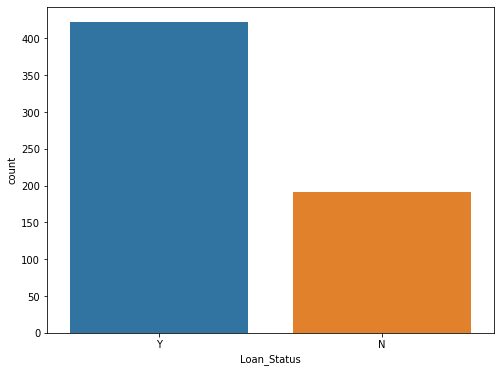

In [21]:
# let's look at the Loan_Status percentage

plt.figure(figsize=(8,6))
sns.countplot(train['Loan_Status']);

print('The percentage of Y class : %.2f' % ((train['Loan_Status'].value_counts()[0] / len(train))*100))
print('The percentage of N class : %.2f' % ((train['Loan_Status'].value_counts()[1] / len(train))*100))

## Plotting categorical variables splitted by Loan_Status

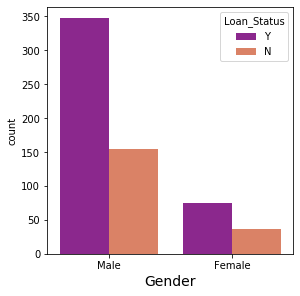

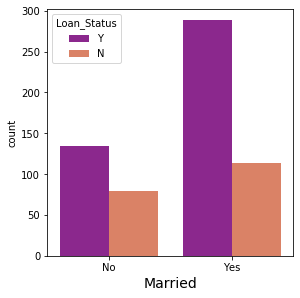

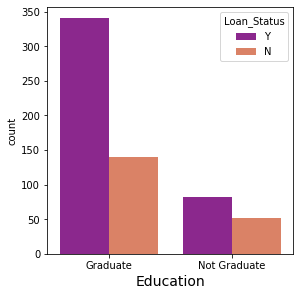

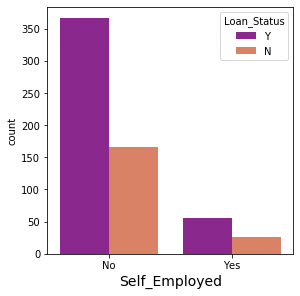

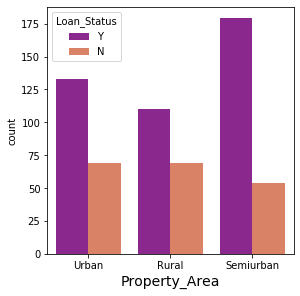

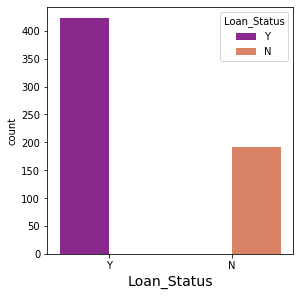

In [22]:
for i in cat_data[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train ,palette='plasma')
    plt.xlabel(i, fontsize=14)

Observations :
<li> Most of the married people did get a loan </li>
<li> If Dependents = 0 , then there is very higher chance of getting a loan </li>
<li> Semiurban Property_Area got more chance to get a loan </li>

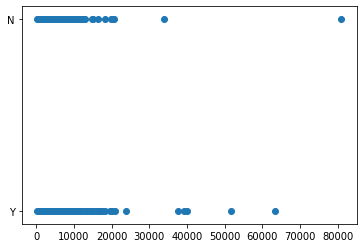

In [23]:
plt.scatter(train['ApplicantIncome'], train['Loan_Status']);

No pattern found

In [24]:
temp=train.Credit_History.value_counts(ascending=True)
print(temp)
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})
print(train.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=np.mean))

0.0     89
1.0    525
Name: Credit_History, dtype: int64
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.790476


From above pivot table we can clearly see that those who have a credit history as 1 have probability of more that 0.79
to avail loan. <br>
Now I will plot Probbality of getting loan vs Credit History

Text(367.48863636363626, 0.5, 'Probability of getting a Loan')

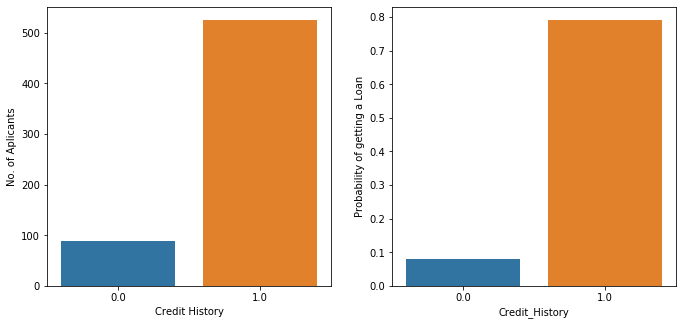

In [25]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=3.0)
sns.barplot(data=train,x='Credit_History',y='Loan_Status',ci=None,ax=ax[1])
ax[0].set_xlabel('Credit History')
ax[0].set_ylabel('No. of Aplicants')
sns.barplot(x=temp.index,y=temp.values,ax=ax[0])
ax[1].set_ylabel('Probability of getting a Loan')

In [26]:
train.groupby('Loan_Status').median()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,
0,0.0,3833.5,268.0,126.5,360.0,1.0
1,0.0,3812.5,1239.5,125.0,360.0,1.0


We can observe that Loan_Status = N, when there is low median in CoapplicantInocme

### Plotting Numerical Variables

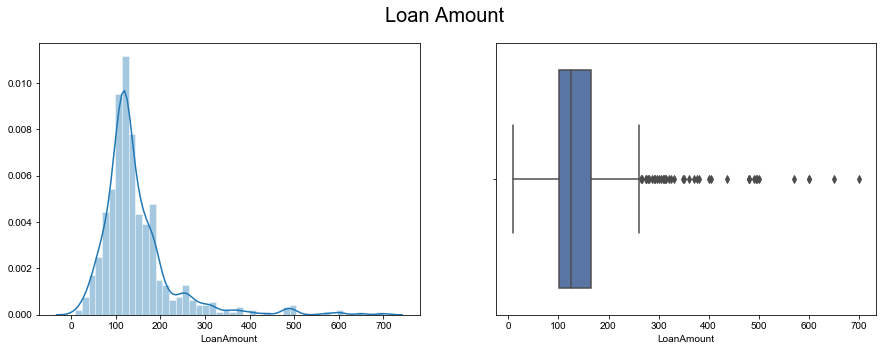

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5),  sharex=False, sharey=False)
fig.suptitle('Loan Amount', fontsize=20)
sns.set(style='darkgrid')
sns.distplot(train['LoanAmount'],ax=ax[0])
sns.boxplot(train['LoanAmount'],ax=ax[1])

From the above plot we see that <em>LoanAmount</em> have lot of outliers. We will have to remove that before modelling

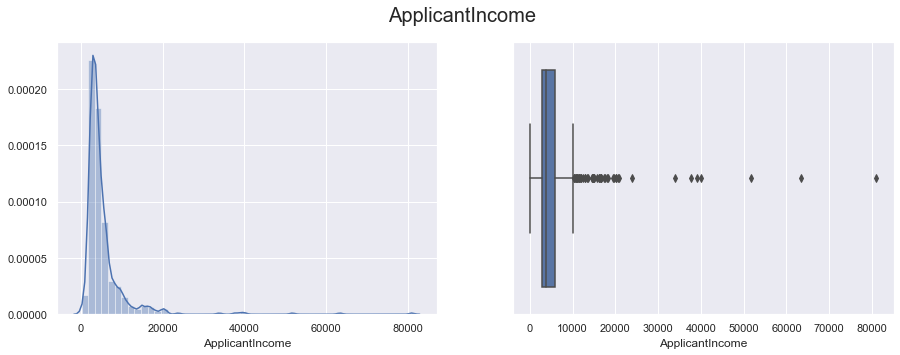

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5),  sharex=False, sharey=False)
fig.suptitle('ApplicantIncome', fontsize=20)
sns.set(style='darkgrid')
sns.distplot(train['ApplicantIncome'],ax=ax[0])
sns.boxplot(train['ApplicantIncome'],ax=ax[1])

From the above plot we see that <em>AplicantIncome</em> have lot of outliers. We will have to remove that before modelling

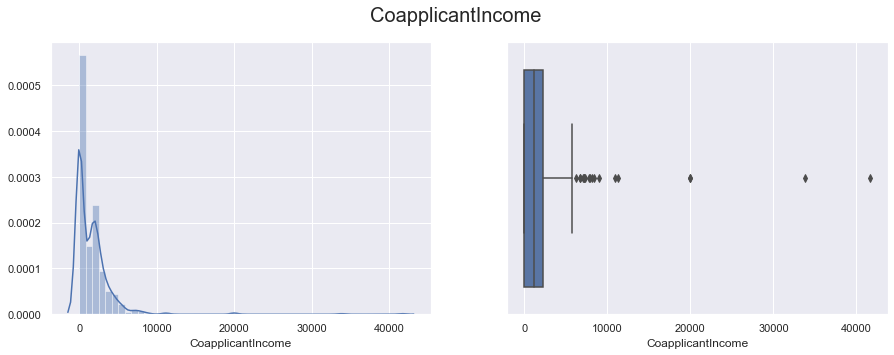

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5),  sharex=False, sharey=False)
fig.suptitle('CoapplicantIncome', fontsize=20)
sns.set(style='darkgrid')
sns.distplot(train['CoapplicantIncome'],ax=ax[0])
sns.boxplot(train['CoapplicantIncome'],ax=ax[1])

From above plots we can see that the distribution is right skewed

### Correlation Matrix

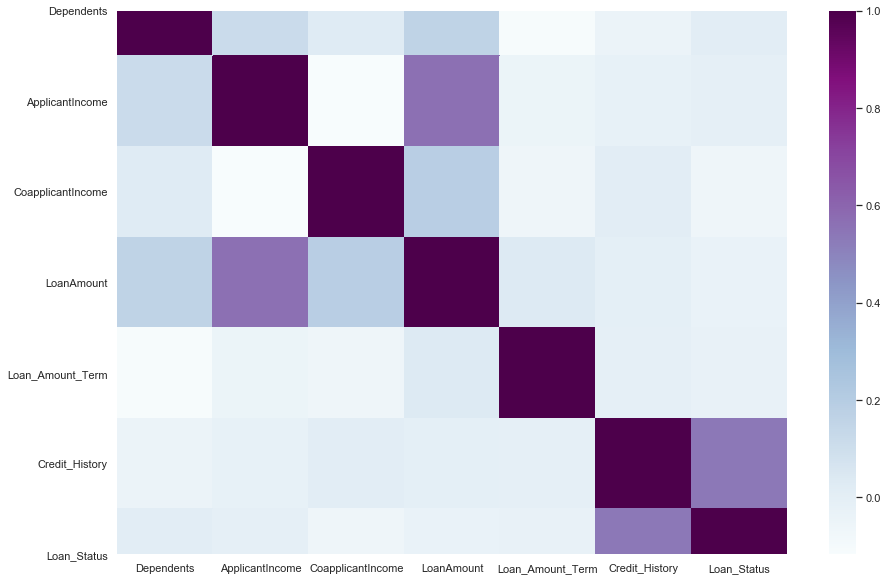

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),cmap='BuPu')

In [31]:
# Correlation table
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1,0.12,0.03,0.16,-0.1,-0.04,0.01
ApplicantIncome,0.12,1,-0.12,0.56,-0.047,-0.019,-0.0047
CoapplicantIncome,0.03,-0.12,1,0.19,-0.059,0.011,-0.059
LoanAmount,0.16,0.56,0.19,1,0.037,-0.00025,-0.032
Loan_Amount_Term,-0.1,-0.047,-0.059,0.037,1,-0.0047,-0.023
Credit_History,-0.04,-0.019,0.011,-0.00025,-0.0047,1,0.54
Loan_Status,0.01,-0.0047,-0.059,-0.032,-0.023,0.54,1


We can clearly see that <em>Credit_History</em> has the highest correlation with <em>Loan_Status</em> (a <strong>positive correlation</strong> of 0.54). <br>
Therefore Loan Status is highly dependant on Credit History.

## Handling Outlier

In [32]:
#loanAmount have lots of outliers,so we will take lograthmic of LoanAmount
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

#Combining Applicant Income and Coapplicant Income and take log of the total income
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

train['TotalIncome_log'] = np.log(train['TotalIncome'])
test['TotalIncome_log'] = np.log(test['TotalIncome']) # doing same for test data


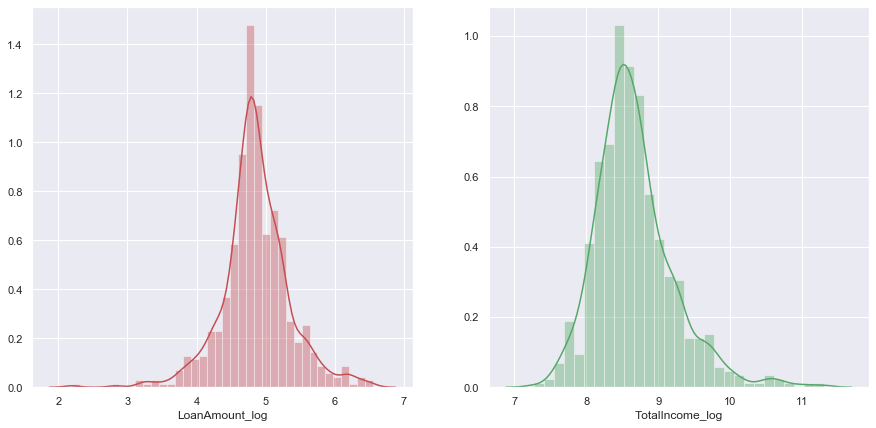

In [33]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.distplot(train['LoanAmount_log'],color='r',ax=ax[0])
sns.distplot(train['TotalIncome_log'],color='g',ax=ax[1])

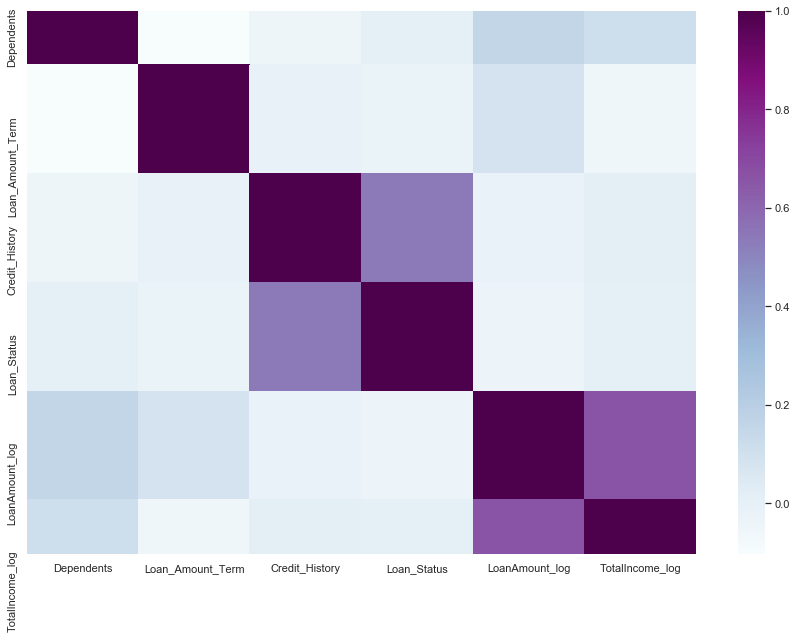

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1).corr(),cmap='BuPu')

# Modelling

In [35]:
# One hot encoding for the categorical variable 
X=train.drop(['ApplicantIncome','CoapplicantIncome','Loan_Status','LoanAmount','TotalIncome'],axis=1)
X=pd.get_dummies(X)

In [36]:
y = train['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
test_data=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1)
test_data=pd.get_dummies(test_data)
test_data.head()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,360.0,1.0,4.700480,8.651724,0,1,0,1,1,0,1,0,0,0,1
1,1.0,360.0,1.0,4.836282,8.428581,0,1,0,1,1,0,1,0,0,0,1
2,2.0,360.0,1.0,5.337538,8.824678,0,1,0,1,1,0,1,0,0,0,1
3,2.0,360.0,1.0,4.605170,8.494129,0,1,0,1,1,0,1,0,0,0,1
4,0.0,360.0,1.0,4.356709,8.094378,0,1,1,0,0,1,1,0,0,0,1


## Logistic Regression

In [38]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)
Predict = LR.predict(test_data) # predictions of test data for which we have to predict whether to approve loan or not

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(LR_SC*100,2)} % Accurate")

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185

82.16 % Accurate


# Random Forest

In [39]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)
Predict = RF.predict(test_data) # predictions of test data for which we have to predict whether to approve loan or not

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)} % Accurate")

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        51
           1       0.84      0.85      0.84       134

    accuracy                           0.77       185
   macro avg       0.72      0.71      0.71       185
weighted avg       0.77      0.77      0.77       185

77.3 % Accurate


## Decision Tree

In [40]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)
Predict = DT.predict(test_data) # predictions of test data for which we have to predict whether to approve loan or not

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)} % Accurate")

              precision    recall  f1-score   support

           0       0.45      0.59      0.51        51
           1       0.82      0.73      0.77       134

    accuracy                           0.69       185
   macro avg       0.64      0.66      0.64       185
weighted avg       0.72      0.69      0.70       185

69.19 % Accurate


In [41]:
score = [DT_SC,RF_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,Logistic Regression,0.821622
1,Random Forest,0.772973
0,Decision Tree,0.691892


## Conclusion
<br>
<li> <em><strong> Credit_History </strong></em> is a very important variable because of its high correlation with <em><strong>Loan_Status </strong></em>. </li>
<li> The <strong>Logistic Regression </strong> algorithm is the most accurate: approximately  <strong>82%</strong>. </li>